In [1]:
!pip install pycaret

     |████████████████████████████████| 301 kB 510 kB/s            
     |████████████████████████████████| 15.6 MB 7.1 MB/s            
     |████████████████████████████████| 114 kB 71.3 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 167 kB 49.3 MB/s            
     |████████████████████████████████| 636 kB 57.9 MB/s            
     |████████████████████████████████| 24.2 MB 66.3 MB/s            
     |████████████████████████████████| 25.9 MB 6.2 kB/s             
     |████████████████████████████████| 10.4 MB 68.5 MB/s            
     |████████████████████████████████| 184 kB 74.9 MB/s            
     |████████████████████████████████| 1.0 MB 54.3 MB/s            
     |████████████████████████████████| 14.8 MB 62.5 MB/s            
     |████████████████████████████████| 79 kB 7.3 MB/s             
     |████████████████████████████████| 58 kB 5.3 MB/s             
  Preparing metadata (setup.py) ... done
  Created wheel for 

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers
from pycaret.classification import *

pd.set_option('display.max_columns',None)

In [13]:
# Loading the Dataset
data = pd.read_csv('../input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv')

In [14]:
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [15]:
data.shape

(9879, 40)

In [16]:
data.drop('gameId',axis=1,inplace=True)

In [17]:
data = data.sample(frac=1).reset_index(drop=True)

In [18]:
data.shape

(9879, 39)

In [19]:
data.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,21,2,1,7,6,6,0,0,0,0,16760,6.8,17857,206,51,-1052,-1064,20.6,1676.0,17,4,0,6,7,6,1,1,0,0,17812,7.2,18921,231,68,1052,1064,23.1,1781.2
1,0,16,25,0,5,7,5,0,0,0,0,16763,7.2,19010,252,48,-729,-620,25.2,1676.3,43,5,1,7,5,6,2,1,1,0,17492,7.2,19630,241,61,729,620,24.1,1749.2
2,1,17,3,0,7,10,7,1,0,1,0,16375,6.8,17469,177,51,-3183,-1884,17.7,1637.5,15,5,1,10,7,9,0,0,0,1,19558,7.2,19353,236,72,3183,1884,23.6,1955.8
3,1,48,2,0,1,3,1,1,1,0,0,15119,6.8,18281,249,64,-326,-294,24.9,1511.9,13,0,1,3,1,3,1,0,1,0,15445,7.4,18575,228,53,326,294,22.8,1544.5
4,0,13,1,0,3,6,4,0,0,0,0,14907,6.6,17149,226,32,-2342,-1982,22.6,1490.7,17,0,1,6,3,5,0,0,0,0,17249,7.2,19131,262,51,2342,1982,26.2,1724.9


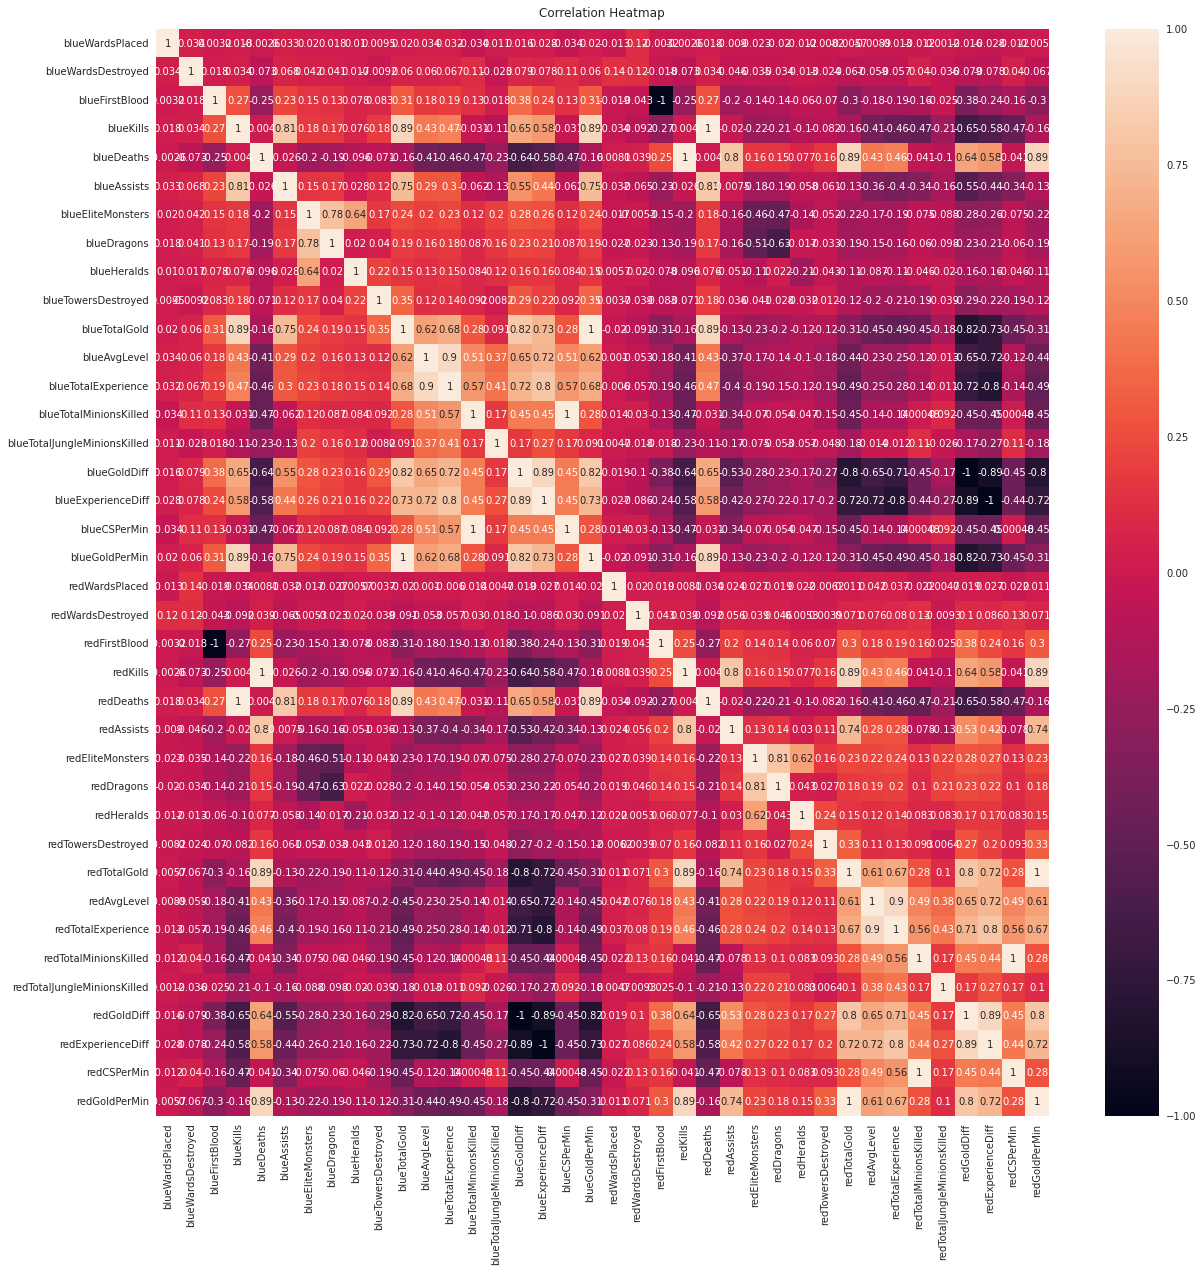

In [22]:
plt.figure(figsize=(20, 20))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [23]:
y = data['blueWins']

In [24]:
y

0       0
1       0
2       1
3       1
4       0
       ..
9874    0
9875    0
9876    0
9877    1
9878    0
Name: blueWins, Length: 9879, dtype: int64

In [21]:
X = data.drop('blueWins',axis=1,inplace=False)

In [25]:
X

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,21,2,1,7,6,6,0,0,0,0,16760,6.8,17857,206,51,-1052,-1064,20.6,1676.0,17,4,0,6,7,6,1,1,0,0,17812,7.2,18921,231,68,1052,1064,23.1,1781.2
1,16,25,0,5,7,5,0,0,0,0,16763,7.2,19010,252,48,-729,-620,25.2,1676.3,43,5,1,7,5,6,2,1,1,0,17492,7.2,19630,241,61,729,620,24.1,1749.2
2,17,3,0,7,10,7,1,0,1,0,16375,6.8,17469,177,51,-3183,-1884,17.7,1637.5,15,5,1,10,7,9,0,0,0,1,19558,7.2,19353,236,72,3183,1884,23.6,1955.8
3,48,2,0,1,3,1,1,1,0,0,15119,6.8,18281,249,64,-326,-294,24.9,1511.9,13,0,1,3,1,3,1,0,1,0,15445,7.4,18575,228,53,326,294,22.8,1544.5
4,13,1,0,3,6,4,0,0,0,0,14907,6.6,17149,226,32,-2342,-1982,22.6,1490.7,17,0,1,6,3,5,0,0,0,0,17249,7.2,19131,262,51,2342,1982,26.2,1724.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,17,2,0,5,7,8,0,0,0,0,16208,7.0,18110,218,54,-1656,-1363,21.8,1620.8,12,3,1,7,5,7,1,1,0,0,17864,7.2,19473,242,73,1656,1363,24.2,1786.4
9875,17,3,0,8,2,15,0,0,0,0,16393,7.2,18783,196,48,1131,1370,19.6,1639.3,17,3,1,2,8,3,1,1,0,0,15262,6.8,17413,253,50,-1131,-1370,25.3,1526.2
9876,19,3,1,2,11,2,0,0,0,0,14959,6.8,16588,226,54,-3301,-2246,22.6,1495.9,16,2,0,11,2,18,1,1,0,0,18260,7.4,18834,203,53,3301,2246,20.3,1826.0
9877,17,1,0,8,6,13,0,0,0,0,17731,7.0,18478,256,34,709,1296,25.6,1773.1,13,1,1,6,8,5,0,0,0,0,17022,6.8,17182,229,54,-709,-1296,22.9,1702.2


In [26]:
train_test_split = 0.7

num_examples = X.shape[0]

num_train_examples = int(np.floor(num_examples * train_test_split))
num_test_examples = int(np.floor(num_examples - num_train_examples))

print('The total number of samples {};\n The total number of training samples {}; \n The the total number of test samples {}; '.format(num_examples,num_train_examples,num_test_examples))


The total number of samples 9879;
 The total number of training samples 6915; 
 The the total number of test samples 2964; 


In [27]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [28]:
# Choose a loss Function: Sparse Categorical CrossEntropy
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    name='sparse_categorical_crossentropy'
)



In [29]:
inputs = tf.keras.Input(shape= (38,))
x = layers.Dense(16, activation=tf.nn.relu)(inputs)
x = layers.Dense(16,activation=tf.nn.relu)(x)
outputs = layers.Dense(2, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 38)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 930
Trainable params: 930
Non-trainable params: 0
_________________________________________________________________


2022-02-24 20:27:10.512341: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [30]:
model.compile(
    optimizer=optimizer, loss=loss, metrics=['accuracy']
)

In [31]:
X_train = X.iloc[0:num_train_examples,:]
y_train = y.iloc[0:num_train_examples]

X_test = X.iloc[num_train_examples:num_examples,:]
y_test = y.iloc[num_train_examples:num_examples]

In [32]:
X_train.head()
print(y_test.shape)

(2964,)


In [33]:
BATCH_SIZE = 32
EPOCHS = 300


In [34]:
model.fit(
    x=X_train, y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1,
    callbacks=None, validation_split=0.2, validation_data=None, shuffle=True)

2022-02-24 20:27:12.721054: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
173/173 [==============================] - 1s 3ms/step - loss: 23.5925 - accuracy: 0.6546 - val_loss: 20.3135 - val_accuracy: 0.6218
Epoch 2/300
173/173 [==============================] - 0s 2ms/step - loss: 11.4282 - accuracy: 0.6285 - val_loss: 25.6060 - val_accuracy: 0.5510
Epoch 3/300
173/173 [==============================] - 0s 1ms/step - loss: 12.7730 - accuracy: 0.6421 - val_loss: 5.5135 - val_accuracy: 0.7339
Epoch 4/300
173/173 [==============================] - 0s 1ms/step - loss: 9.8451 - accuracy: 0.6435 - val_loss: 18.7560 - val_accuracy: 0.5517
Epoch 5/300
173/173 [==============================] - 0s 2ms/step - loss: 6.3154 - accuracy: 0.6522 - val_loss: 2.5370 - val_accuracy: 0.6609
Epoch 6/300
173/173 [==============================] - 0s 2ms/step - loss: 9.5033 - accuracy: 0.6428 - val_loss: 7.1023 - val_accuracy: 0.5503
Epoch 7/300
173/173 [==============================] - 0s 2ms/step - loss: 10.8648 - accuracy: 0.6441 - val_loss: 3.1733 - val_accuracy:

In [35]:
s = setup(data, target = 'blueWins')

,Description,Value
0,session_id,4119
1,Target,blueWins
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9879, 39)"
5,Missing Values,False
6,Numeric Features,24
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [36]:
best = compare_models()



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7300,0.8088,0.7335,0.7319,0.7323,0.4600,0.4606,0.0500
ridge,Ridge Classifier,0.7294,0.0000,0.7332,0.7313,0.7318,0.4588,0.4595,0.0270
lr,Logistic Regression,0.7274,0.8065,0.7289,0.7301,0.7291,0.4548,0.4553,0.4610
gbc,Gradient Boosting Classifier,0.7274,0.8052,0.7240,0.7326,0.7278,0.4548,0.4555,0.8950
rf,Random Forest Classifier,0.7267,0.8023,0.7241,0.7314,0.7273,0.4534,0.4539,0.5900
catboost,CatBoost Classifier,0.7218,0.8016,0.7189,0.7267,0.7224,0.4435,0.4441,4.0370
ada,Ada Boost Classifier,0.7199,0.7965,0.7252,0.7214,0.7226,0.4397,0.4405,0.2550
nb,Naive Bayes,0.7193,0.7899,0.7528,0.7086,0.7298,0.4384,0.4396,0.0230
et,Extra Trees Classifier,0.7190,0.7950,0.7163,0.7232,0.7195,0.4380,0.4383,0.5550
lightgbm,Light Gradient Boosting Machine,0.7158,0.7943,0.7137,0.7200,0.7165,0.4317,0.4321,0.1900


In [37]:
evaluate_model(best)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [39]:
loss,accuracy = model.evaluate(X_test,y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.5909 - accuracy: 0.7217
